In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data.csv', index_col=0)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Value counts for the target variable
print(df['Reached.on.Time_Y.N'].value_counts())

       Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         10999.000000     10999.000000         10999.000000   
mean              4.054459         2.990545           210.196836   
std               1.141490         1.413603            48.063272   
min               2.000000         1.000000            96.000000   
25%               3.000000         2.000000           169.000000   
50%               4.000000         3.000000           214.000000   
75%               5.000000         4.000000           251.000000   
max               7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.0

In [45]:
df.describe()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,2.333394,0.998454,4.054459,2.990545,210.196836,3.567597,0.604600,0.495863,13.373216,3634.016729,0.596691
std,1.490726,0.567099,1.141490,1.413603,48.063272,1.522860,0.641464,0.500006,16.205527,1635.377251,0.490584
min,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1001.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,169.000000,3.000000,0.000000,0.000000,4.000000,1839.500000,0.000000
50%,3.000000,1.000000,4.000000,3.000000,214.000000,3.000000,1.000000,0.000000,7.000000,4149.000000,1.000000
75%,4.000000,1.000000,5.000000,4.000000,251.000000,4.000000,1.000000,1.000000,10.000000,5050.000000,1.000000
max,4.000000,2.000000,7.000000,5.000000,310.000000,10.000000,2.000000,1.000000,65.000000,7846.000000,1.000000


In [16]:
print(df["Mode_of_Shipment"].unique())
print(df["Warehouse_block"].unique())
print(df["Product_importance"].unique())

['Flight' 'Ship' 'Road']
['D' 'F' 'A' 'B' 'C']
['low' 'medium' 'high']


In [7]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [24]:
# encoding categorical variables

# 'A' is mapped to 0, 'B' to 1, 'C' to 2, 'D' to 3, and 'F' to 4
df['Warehouse_block'] = df['Warehouse_block'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4})

# 'Flight' is mapped to 0, 'Ship' to 1, and 'Road' to 2
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].map({'Flight': 0, 'Ship': 1, 'Road': 2})

# 'low' is mapped to 0, 'medium' to 1, and 'high' to 2
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})

# Converting the 'Gender' column to numerical values using a lambda function
# If the value is 'M', it is mapped to 1; otherwise, it is mapped to 0
df['Gender'] = df['Gender'].apply(lambda val: 1 if val == 'M' else 0)

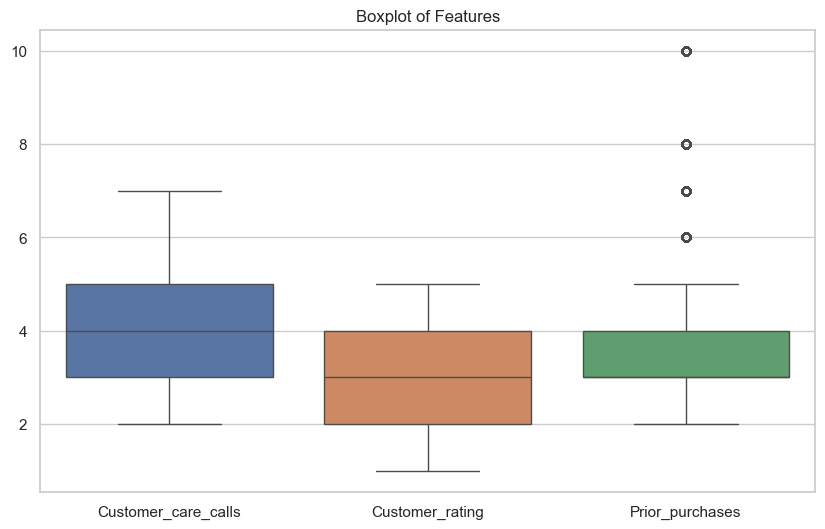

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for each feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["Customer_care_calls", "Customer_rating", "Prior_purchases"]])
plt.title("Boxplot of Features")
plt.savefig("boxplot1.png")
plt.show()

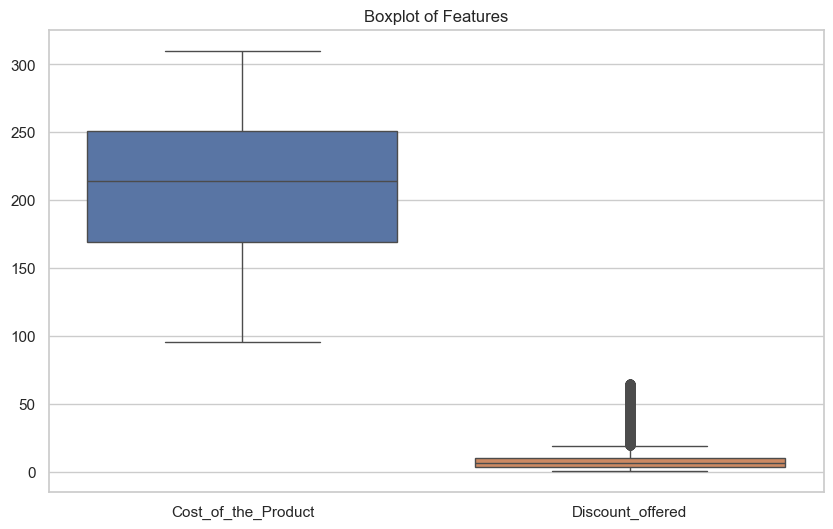

In [13]:
# Boxplot for each feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["Cost_of_the_Product", "Discount_offered"]])
plt.title("Boxplot of Features")
plt.savefig("boxplot2.png")
plt.show()

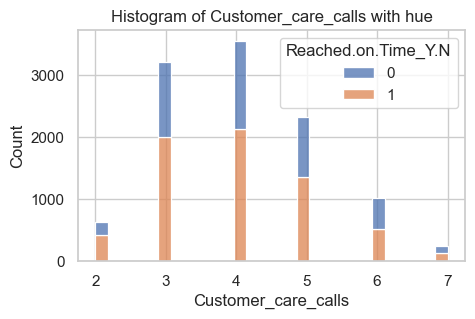

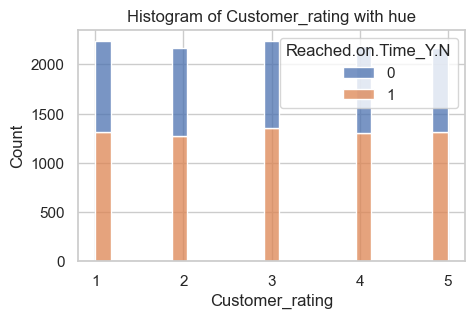

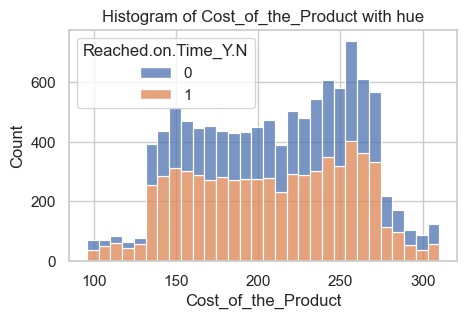

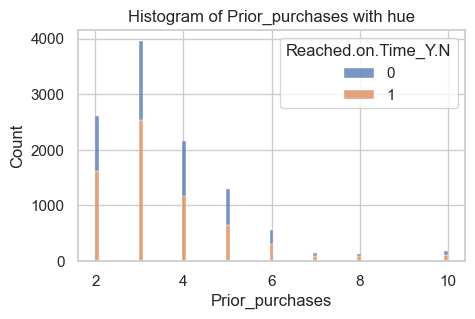

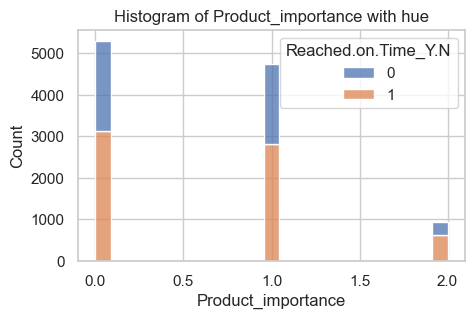

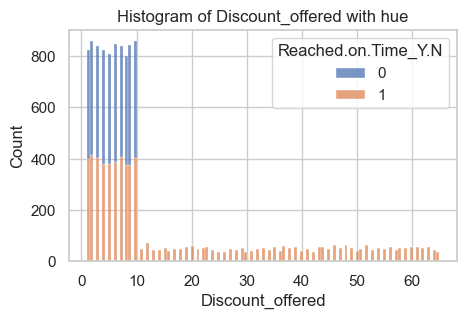

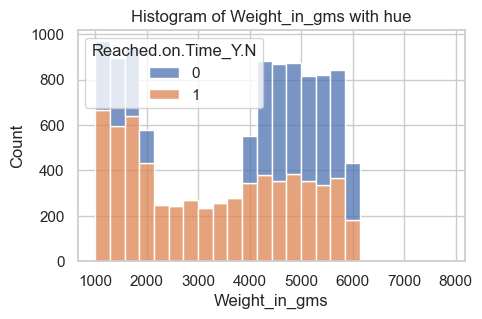

In [44]:


# Set the style of the plots
columns = [ 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Discount_offered', 'Weight_in_gms'
       ]

for column in columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=df, x=column, hue='Reached.on.Time_Y.N', multiple='stack')
    plt.title(f'Histogram of {column} with hue')
    plt.show()


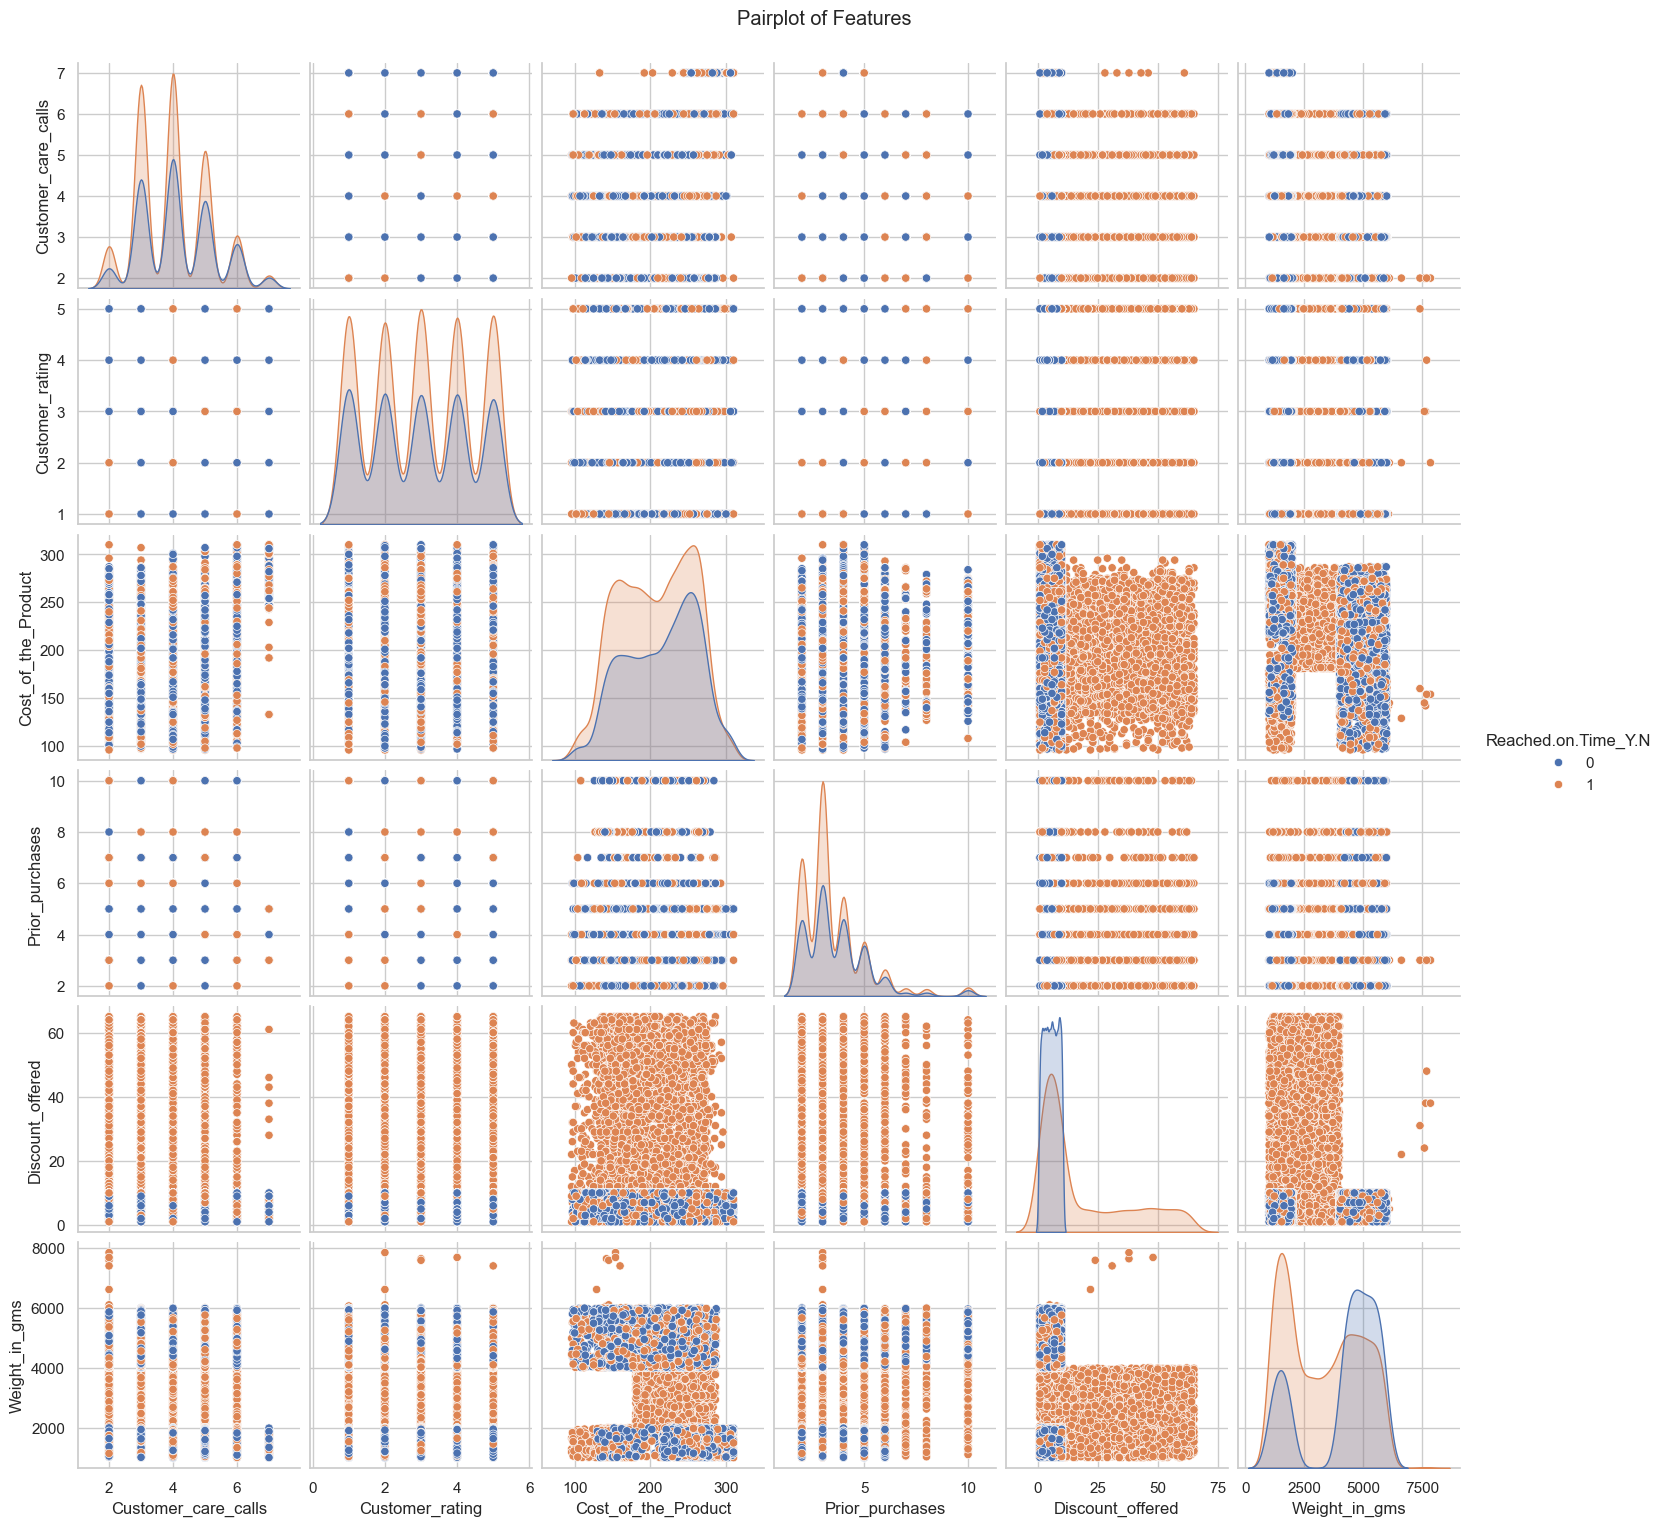

In [31]:
# Pairplot to visualize relationships between features
sns.pairplot(df[['Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N']], hue="Reached.on.Time_Y.N")
plt.suptitle("Pairplot of Features", y=1.02)
plt.savefig("pairplot.png")
plt.show()

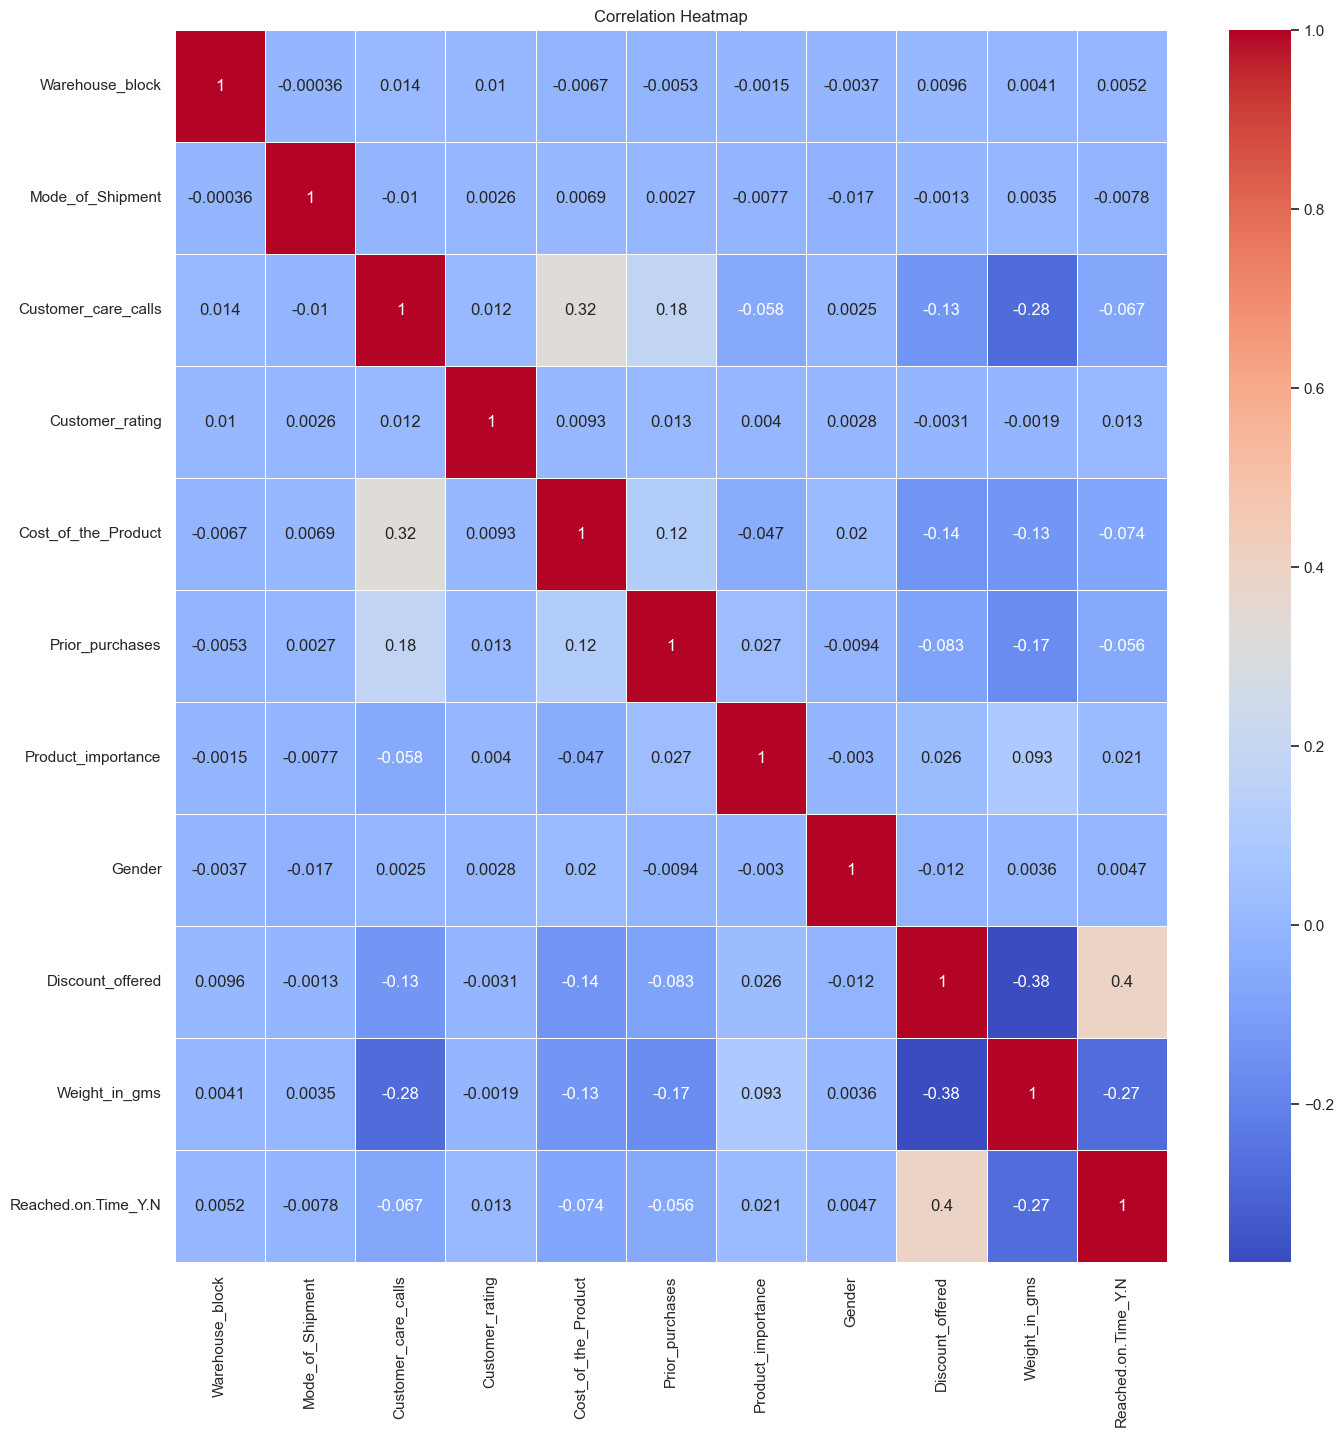

In [33]:
# Correlation heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(df[['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()